In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['text.usetex'] = True

In [2]:
def func1(x):
    f1 = 0.2 * np.sin(2 * np.pi * 8 * x**4)
    f2 = 0.5*np.sin(2 * np.pi * 1.5 * ((x-0.5)**2))
    f3 = np.sin(2 * np.pi * 1 * (x**3+0.1))
    f4 = (x-0.8)**2
    return f1 + f2 + f3 + f4

def func2(x):
    f1 = np.cos(2*np.pi * 0.8 * (x)**2)
    f2 = 0.3*np.sin(2*np.pi * 10 * np.exp(0.3*x))
    f3 = 0.4 * np.sin(2*np.pi * 10 * x**2)
    return f1 + f2 + f3

(0.0, 1.0)

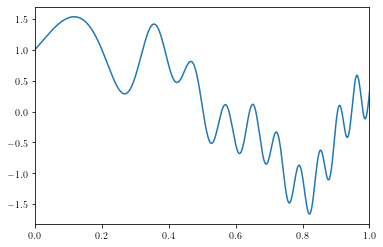

In [3]:
Nx = 2001
x = np.linspace(-0.5,1.5,Nx)
y = func2(x)
plt.plot(x,y)
plt.xlim([0,1])

In [4]:
from scipy.fft import fft, ifft
from scipy import signal

In [5]:
nu1 = 100
nu2 = 50
nu3 = 20

window = signal.gaussian(Nx, std=nu1)
window = window / np.sum(window)
y1 = np.convolve(y, window, 'same')
y1 = y1 + 4.5

window = signal.gaussian(Nx, std=nu2)
window = window / np.sum(window)
y2 = np.convolve(y, window, 'same')
y2 = y2 + 3

window = signal.gaussian(Nx, std=nu3)
window = window / np.sum(window)
y3 = np.convolve(y, window, 'same')
y3 = y3 + 1.5

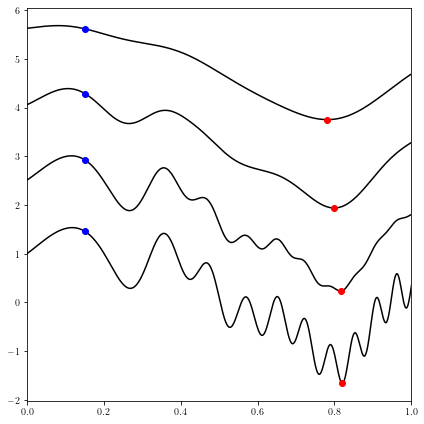

In [6]:
plt.figure(figsize=(6,6))

plt.plot(x, y, 'k')
plt.plot(x, y3, 'k')
plt.plot(x, y2, 'k')
plt.plot(x, y1, 'k')

plt.plot(x[np.where(y == y.min())], y.min(), 'ro')
plt.plot(x[np.where(y1 == y1.min())], y1.min(), 'ro')
plt.plot(x[np.where(y2 == y2.min())], y2.min(), 'ro')
plt.plot(x[np.where(y3 == y3.min())], y3.min(), 'ro')

plt.plot(x[651], y[651], 'bo')
plt.plot(x[651], y1[651], 'bo')
plt.plot(x[651], y2[651], 'bo')
plt.plot(x[651], y3[651], 'bo')

arrow = mpatches.FancyArrow(0.82,-0.2,0,-1, width=0.01, length_includes_head=True, color="r")


plt.xlim([0,1])
plt.tight_layout()

[(0.0, 2.0), (0.0, 2.0)]

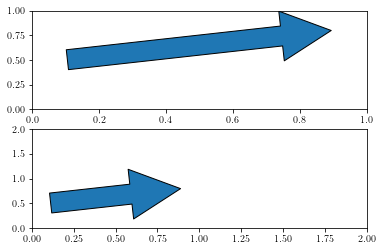

In [7]:
x_tail = 0.1
y_tail = 0.5
x_head = 0.9
y_head = 0.8
dx = x_head - x_tail
dy = y_head - y_tail

fig, axs = plt.subplots(nrows=2)
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[0].add_patch(arrow)

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[1].add_patch(arrow)
axs[1].set(xlim=(0, 2), ylim=(0, 2))

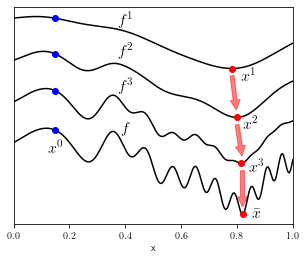

In [11]:
fig, ax = plt.subplots(nrows=1, figsize=(5,4))

plt.plot(x, y, 'k')
plt.plot(x, y3, 'k')
plt.plot(x, y2, 'k')
plt.plot(x, y1, 'k')

plt.plot(x[np.where(y == y.min())], y.min(), 'ro')
plt.plot(x[np.where(y1 == y1.min())], y1.min(), 'ro')
plt.plot(x[np.where(y2 == y2.min())], y2.min(), 'ro')
plt.plot(x[np.where(y3 == y3.min())], y3.min(), 'ro')

plt.plot(x[650], y[650], 'bo')
plt.plot(x[650], y1[650], 'bo')
plt.plot(x[650], y2[650], 'bo')
plt.plot(x[650], y3[650], 'bo')

arrow1 = mpatches.FancyArrowPatch((0.82, y3.min()-0.2), (0.821, y.min()+0.2),
                                 mutation_scale=20, alpha=0.5, color='r')
arrow2 = mpatches.FancyArrowPatch((0.8, y2.min()-0.2), (0.82, y3.min()+0.2),
                                 mutation_scale=20, alpha=0.5, color='r')
arrow3 = mpatches.FancyArrowPatch((0.782, y1.min()-0.2), (0.8, y2.min()+0.2),
                                 mutation_scale=20, alpha=0.5, color='r')
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(arrow3)

plt.text(0.4, 0.94, r"$f^1$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.4, 0.8, r"$f^2$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.4, 0.64, r"$f^3$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.4, 0.44, r"$f$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)

plt.text(0.15, 0.35, r"$x^0$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.84, 0.68, r"$x^1$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.85, 0.46, r"$x^2$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.87, 0.26, r"$x^3$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.text(0.87, 0.05, r"$\bar x$", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=16)

ax.set_yticks([])
plt.xlim([0,1])
plt.xlabel('x')

plt.savefig('/Users/lida/Desktop/ML_opt/paper/images/fig1.pdf')

In [9]:
x[np.where(y1 == y1.min())]

array([0.782])

In [10]:
x[650]

0.15000000000000002

In [141]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy import signal

np.random.seed(0)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rcParams['text.usetex'] = True
from matplotlib import colors

np.random.seed(0)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rcParams['text.usetex'] = True

In [36]:
# Nx = 101
# Ny = 101
# x = range(-3,stop=4,length=Nx)
# y = range(-3,stop=4,length=Nx)
# X = repeat(x,1,Ny)
# Y = repeat(y',Nx,1)
# Z = sin.(X+Y) + (X-Y).^2 - 1.5*X + 2.5*Y .+ 3
# pcolor(X,Y,Z, cmap="nipy_spectral")

def obj_fn(x):
    return np.sin(x[0]+x[1]) + (x[0]-x[1])**2 - 1.5*x[0] + 2.5*x[1] + 3

def grad_fn(x):
    gg = np.zeros(2)
    gg[0] = np.cos(x[0]+x[1]) + 2*(x[0]-x[1]) - 1.5
    gg[1] = np.cos(x[0]+x[1]) - 2*(x[0]-x[1]) + 2.5
    return gg

In [183]:
nu = 1
Nr = 500
x0 = [0,2]


In [184]:
np.random.seed(0)
x_sample = multivariate_normal.rvs(x0, 1/nu, size=Nr)
grad_sample = np.zeros(2)
        
for j in range(Nr):
    grad_sample += grad_fn(x_sample[j])

grad_sample = grad_sample / Nr

In [185]:
grad_sample =  10 * grad_sample / np.linalg.norm(grad_sample,2)**2

In [186]:
grad = grad_fn(x0)
grad = 10*grad / np.linalg.norm(grad,2)**2
print(grad)
print(grad_sample)

[-0.8215266  0.8448146]
[-0.76677214  0.87119026]


In [187]:
x, y = np.mgrid[-3:4:.05, -3:4:.05]
pos = np.dstack((x, y))
val = np.zeros([pos.shape[0],pos.shape[1]])

for i in range(pos.shape[0]):
    for j in range(pos.shape[1]):
        val[i,j] = obj_fn([pos[i,j,0], pos[i,j,1]])


# plt.scatter(x0[0],x0[1],color="r")
# plt.scatter(x_sample[:,0],x_sample[:,1],color="b", alpha=0.05)
# plt.title("objective function")

arrow1 = mpatches.FancyArrowPatch((0, 0), (1, 1),
                                 mutation_scale=200, alpha=1, color='r')
# arrow2 = mpatches.FancyArrowPatch((0.8, y2.min()-0.2), (0.82, y3.min()+0.2),
#                                  mutation_scale=20, alpha=0.5, color='r')
ax.add_patch(arrow1)
# ax.add_patch(arrow2)

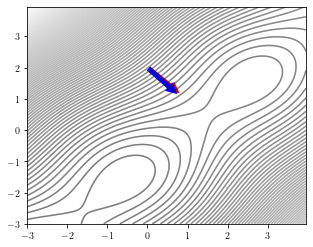

In [188]:
fig, ax = plt.subplots(nrows=1, figsize=(5,4))

ax.contour(x,y,val,cmap="gray",levels=100, alpha=0.3)
arrow1 = mpatches.FancyArrowPatch((x0[0], x0[1]), (x0[0]-grad[0], x0[1]-grad[1]),
                                 mutation_scale=20, alpha=1, color='r')
ax.add_patch(arrow1)
ax.contour(x,y,val,cmap="gray",levels=100, alpha=0.3)
arrow1 = mpatches.FancyArrowPatch((x0[0], x0[1]), (x0[0]-grad_sample[0], x0[1]-grad_sample[1]),
                                 mutation_scale=20, alpha=1, color='b')
ax.add_patch(arrow1)